In [3]:
library('igraph')


Warning message:
"package 'igraph' was built under R version 3.6.3"
Attaching package: 'igraph'

The following objects are masked from 'package:stats':

    decompose, spectrum

The following object is masked from 'package:base':

    union



[1] "C:/Users/USER/Desktop/EE232E/Project_2"

[1] "facebook"                  "facebook_combined.txt"    
 [3] "facebook_combined.txt.gz"  "P2_Q1_Q10.ipynb"          
 [5] "Part1_Q16_17.ipynb"        "Plot"                     
 [7] "Problem1_Q12.13.14 .ipynb" "Project 2.ipynb"          
 [9] "project_2.ipynb"           "project_2_old.ipynb"      
[11] "Q1-10.ipynb"

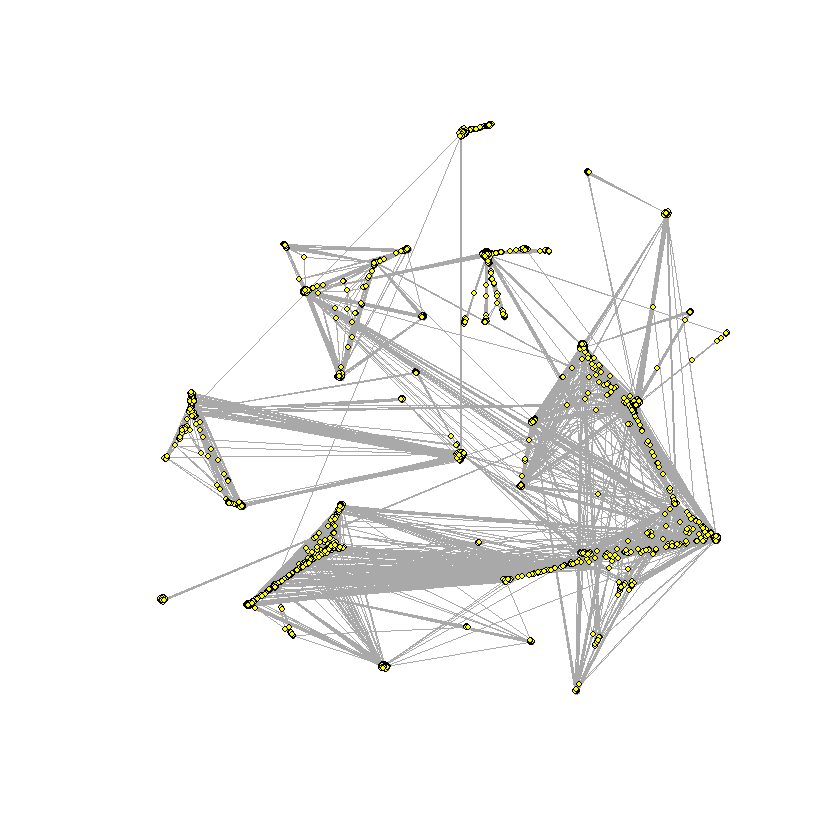

In [4]:
getwd()
list.files()

dd <- read.table("facebook_combined.txt")
gg <- graph.data.frame(dd, directed=FALSE)
plot(gg,vertex.size=2,vertex.label=NA, vertex.color="yellow",edge.width=1,edge.arrow.size=0.1);

In [5]:
cat("Network connection:",is.connected(gg))

Network connection: TRUE

In [6]:
cat("Nodes:", vcount(gg))

Nodes: 4039

In [7]:
cat("Edges:",ecount(gg))

Edges: 88234

In [8]:
#question 2
cat("Diameter:",diameter(gg))

Diameter: 8

In [9]:
#question 3
print(V(gg)[3])


+ 1/4039 vertex, named, from b0a1f9f:
[1] 2


[1] "number of nodes of vertex with id = 1 348"
[1] "number of edges of vertex with id = 1 2866"


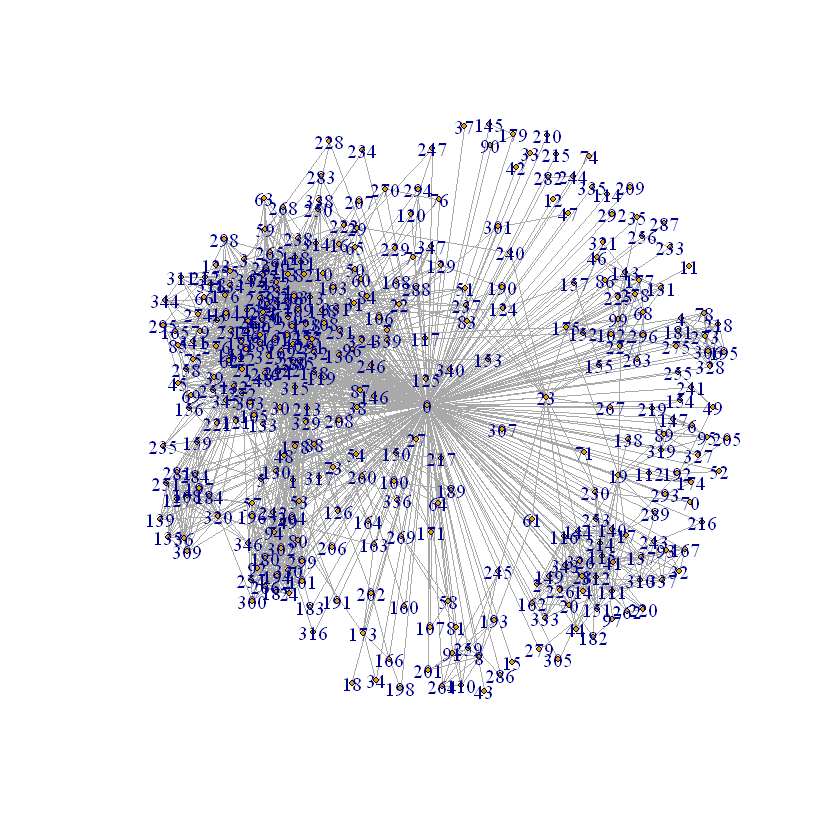

In [10]:
#question 5

eg = make_ego_graph(gg,order=1, nodes=c('0'))[[1]]
print(paste("number of nodes of vertex with id = 1",vcount(eg)))
print(paste("number of edges of vertex with id = 1",ecount(eg)))

plot(eg,vertex.size = 2)


In [11]:
#question 6

cat("Diameter:",diameter(eg))

Diameter: 2

In [12]:
#question 8

core_nodes = c()
for(i in 1:vcount(gg)) {
  # i-th element of `u1` squared into `i`-th position of `usq`
eg = make_ego_graph(gg, order=1, nodes=c(i))[[1]]
if (vcount(eg) > 201){
    core_nodes = append(core_nodes, vcount(eg))
}
}
print(paste("number of core nodes:",length(core_nodes)))
print(paste("average degree of core nodes:",sum(core_nodes)/length(core_nodes)))



[1] "number of core nodes: 40"
[1] "average degree of core nodes: 280.375"


[1] "modularity:  0.413101372834235 , node id:  1"
[1] "modularity:  0.435929376026475 , node id:  108"


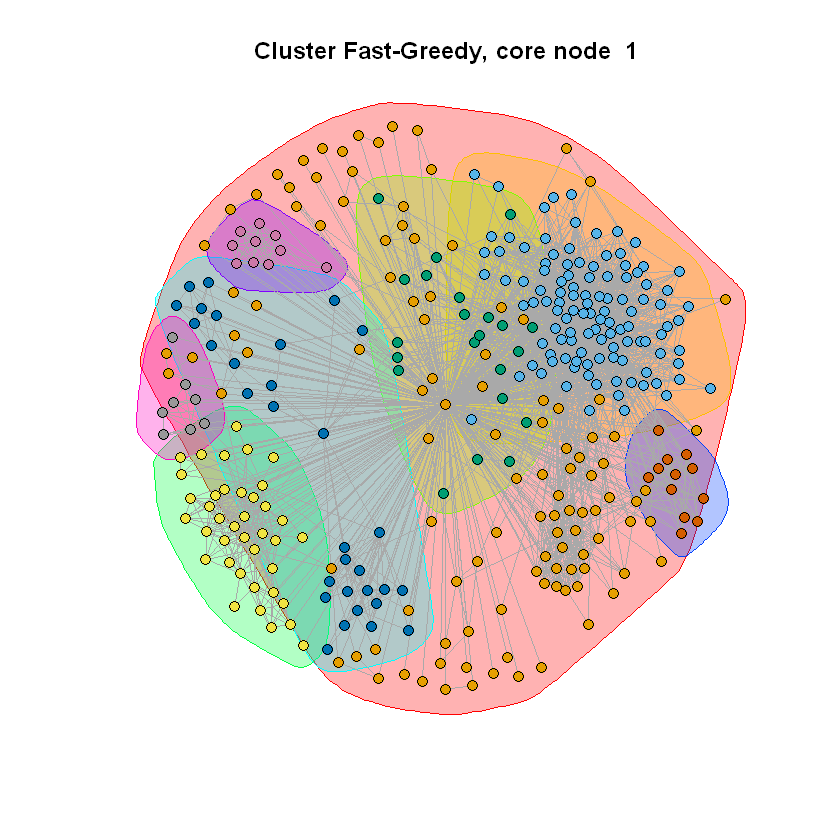

[1] "modularity:  0.250210443308849 , node id:  349"


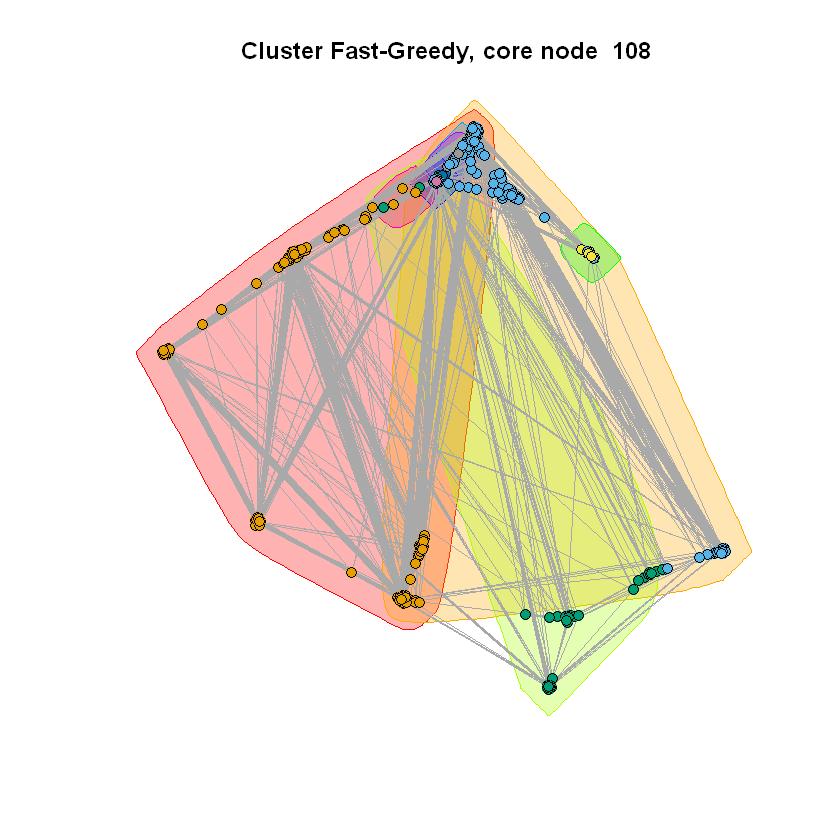

[1] "modularity:  0.507001642196514 , node id:  484"


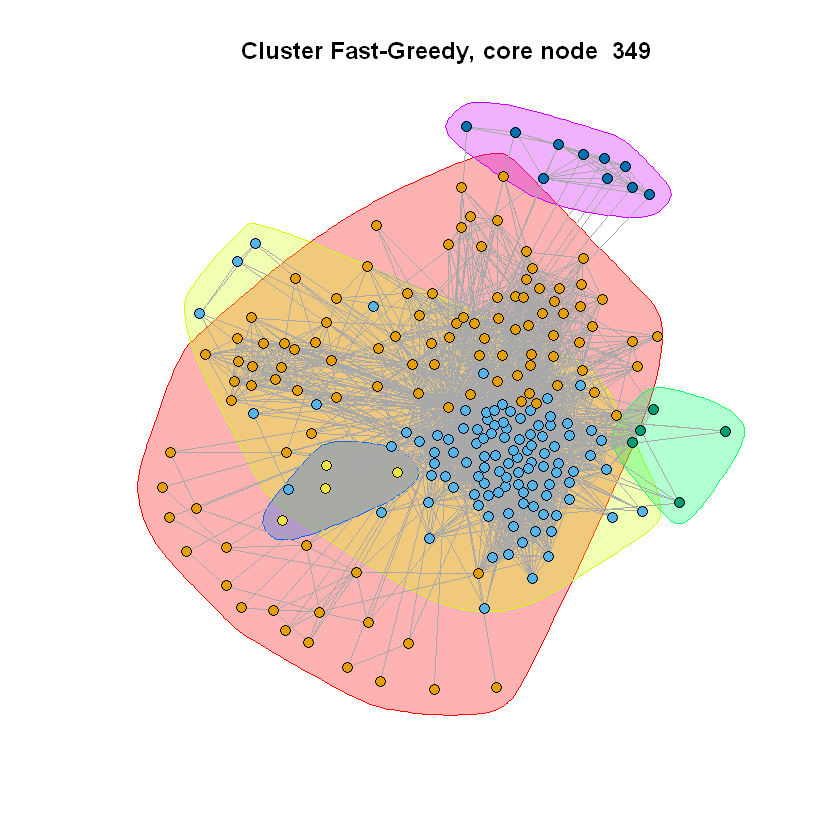

[1] "modularity:  0.145531499565493 , node id:  1087"


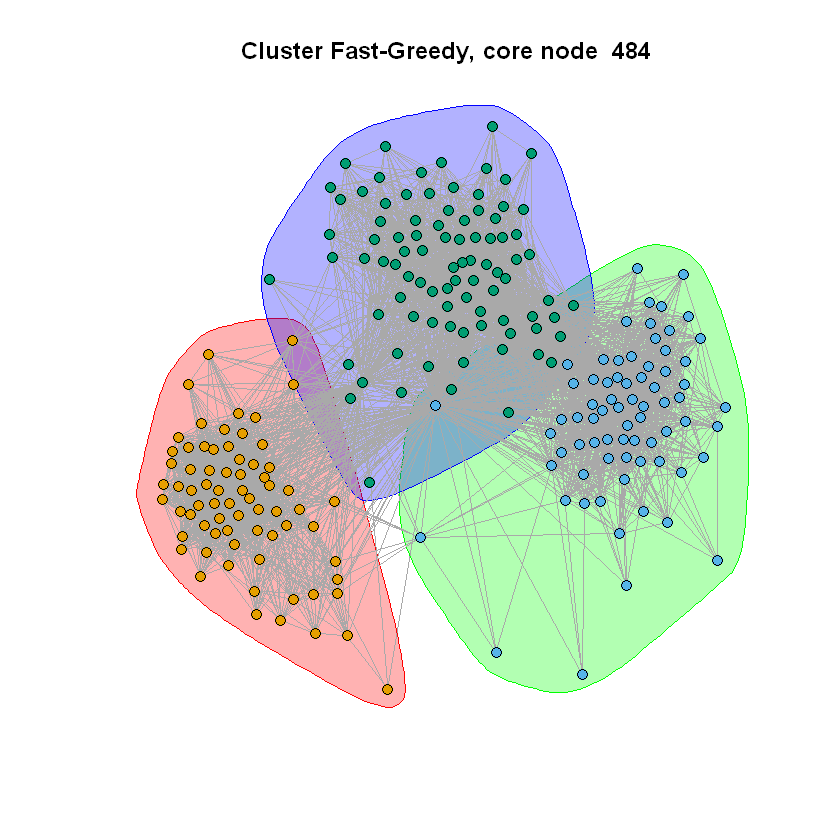

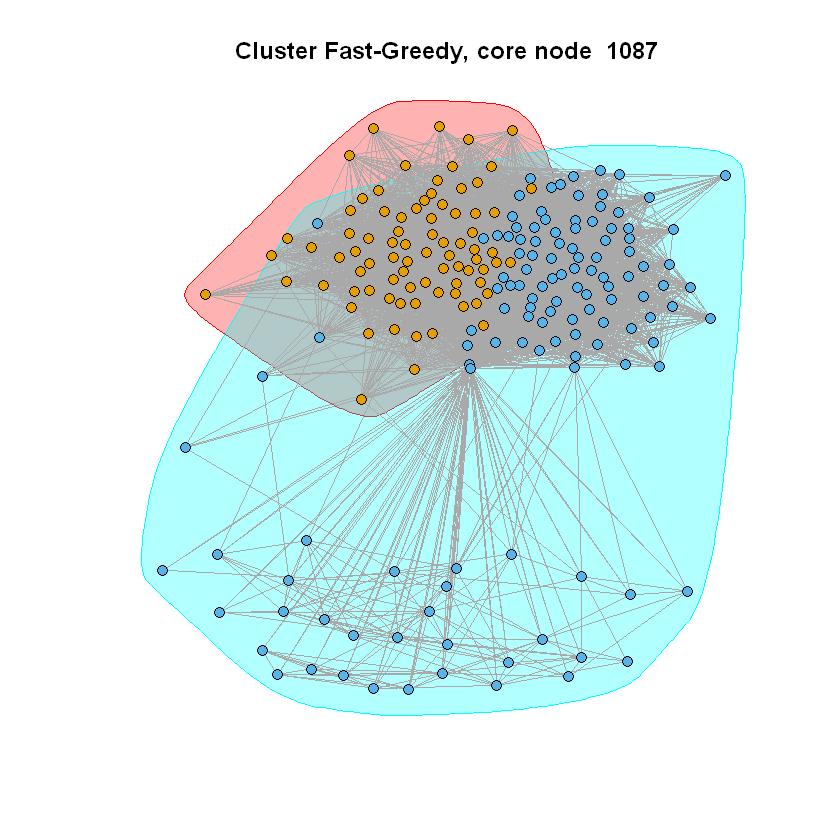

In [13]:
#question 9

tostudy = c('0','107','348','483','1086')
ids = c(1,108,349,484,1087)
for(i in 1:length(tostudy)) {
    eg = make_ego_graph(gg, order=1, nodes=tostudy)[[i]]

    community = cluster_fast_greedy(eg)
    print(paste('modularity: ',modularity(community), ', node id: ', ids[i]))

    plot(eg, mark.groups= community, vertex.color= membership(community),vertex.size =4, vertex.label =NA , main = paste(" Cluster Fast-Greedy, core node ",ids[i]))
    
}

    



[1] "modularity:  0.353302172546335 , node id:  1"
[1] "modularity:  0.506754916538902 , node id:  108"


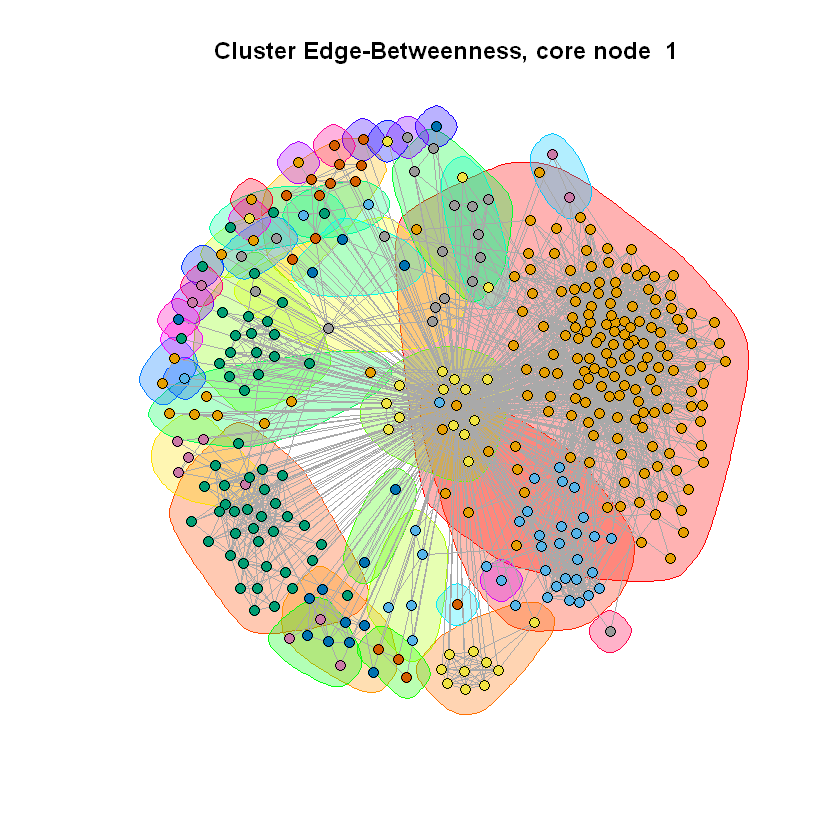

[1] "modularity:  0.133528021370078 , node id:  349"


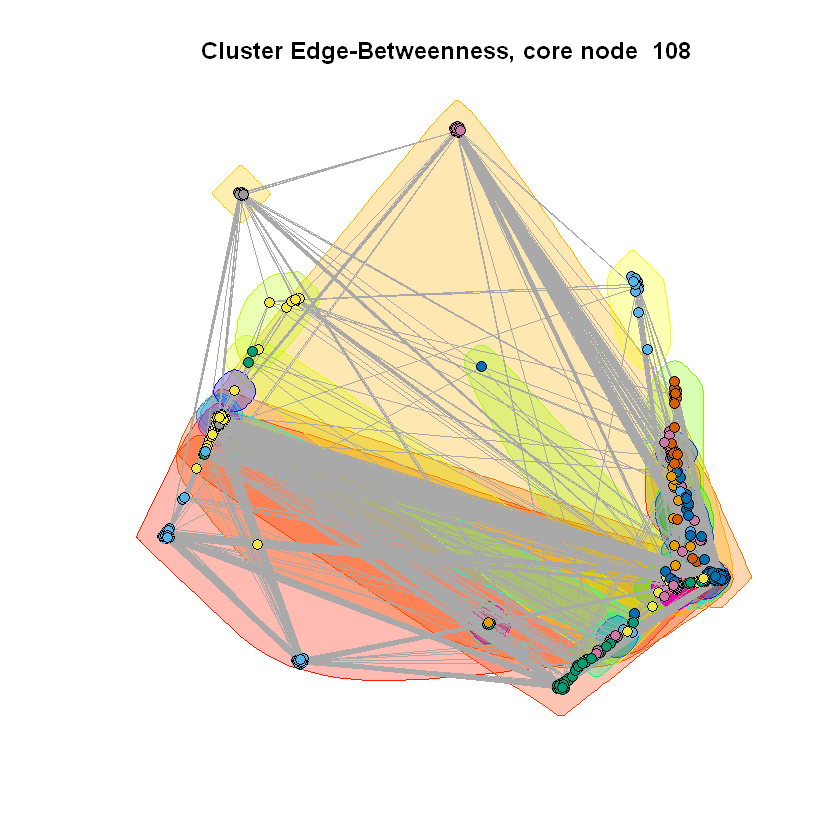

[1] "modularity:  0.489095180244803 , node id:  484"


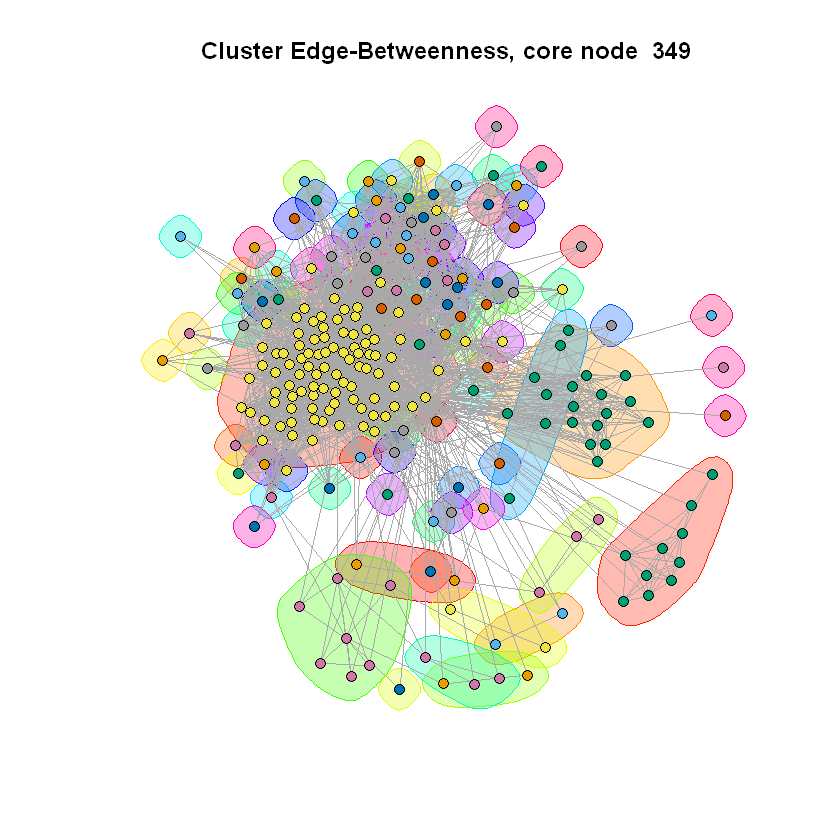

[1] "modularity:  0.027623772388464 , node id:  1087"


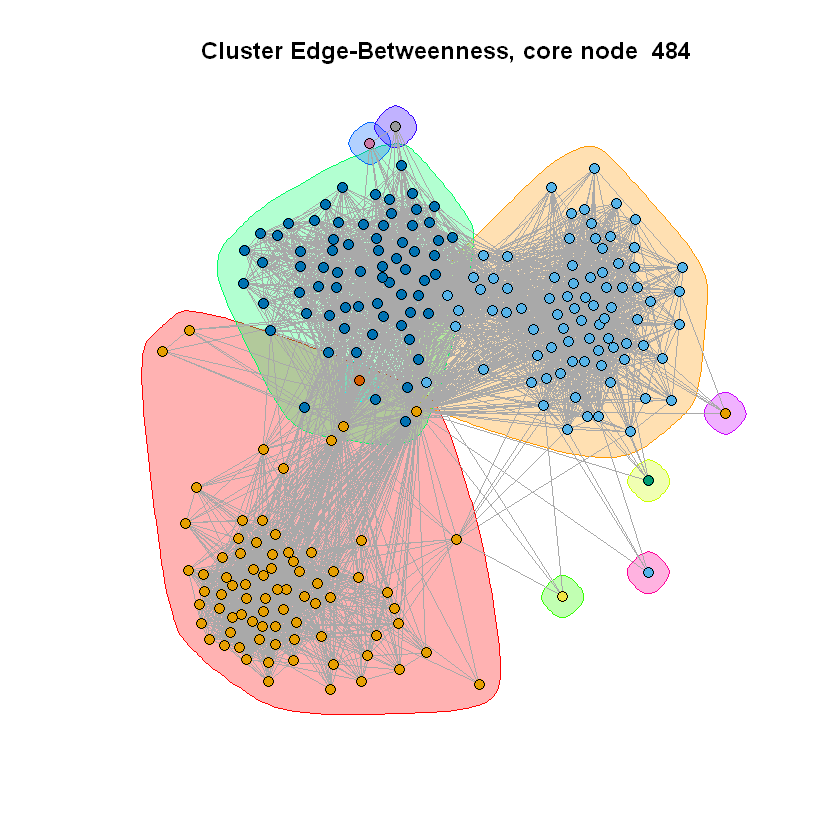

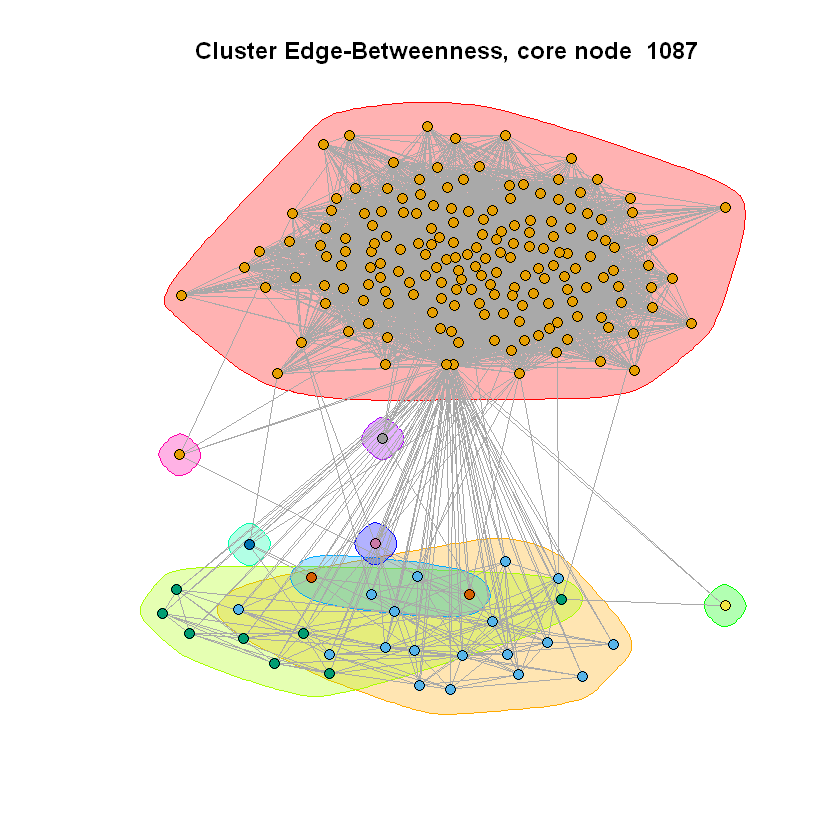

In [15]:


for(i in 1:length(tostudy)) {
    eg = make_ego_graph(gg, order=1, nodes=tostudy)[[i]]

    community = cluster_edge_betweenness(eg)
    print(paste('modularity: ',modularity(community), ', node id: ', ids[i]))

    plot(eg, mark.groups= community, vertex.color= membership(community),vertex.size =4, vertex.label =NA , main = paste(" Cluster Edge-Betweenness, core node ",ids[i]))
    
}


[1] "modularity:  0.389118471050977 , node id:  1"
[1] "modularity:  0.508249171320581 , node id:  108"


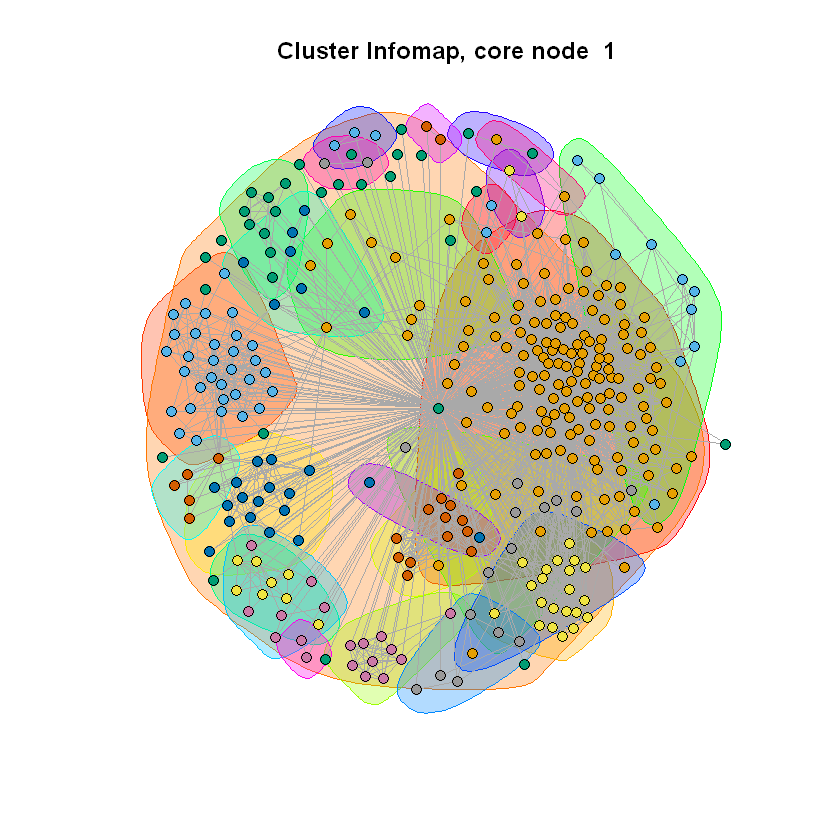

[1] "modularity:  0.203752997872299 , node id:  349"


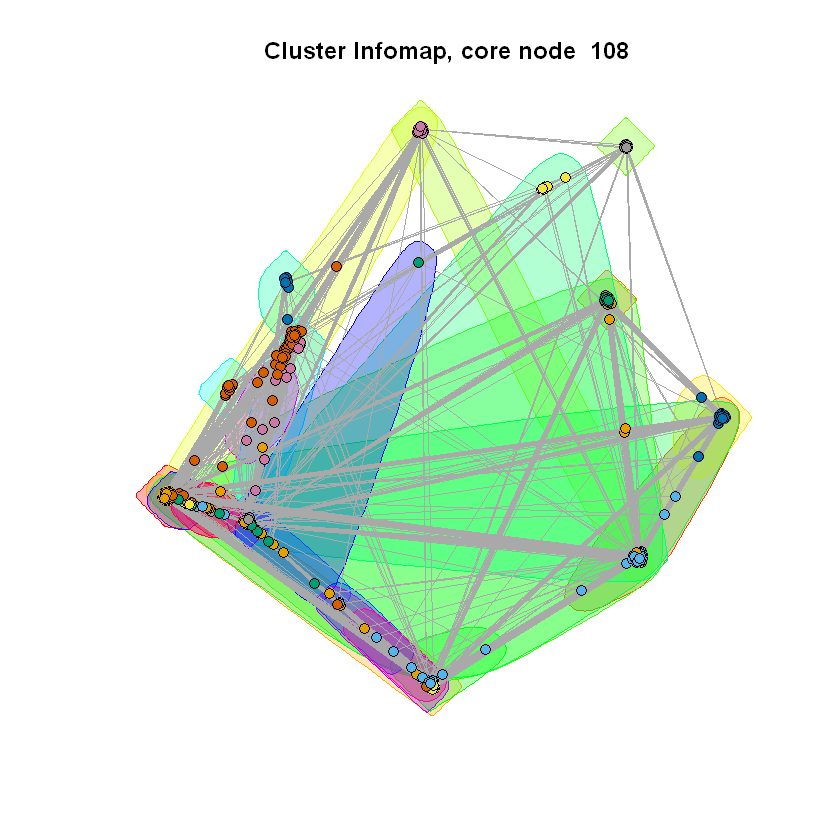

[1] "modularity:  0.515278752174842 , node id:  484"


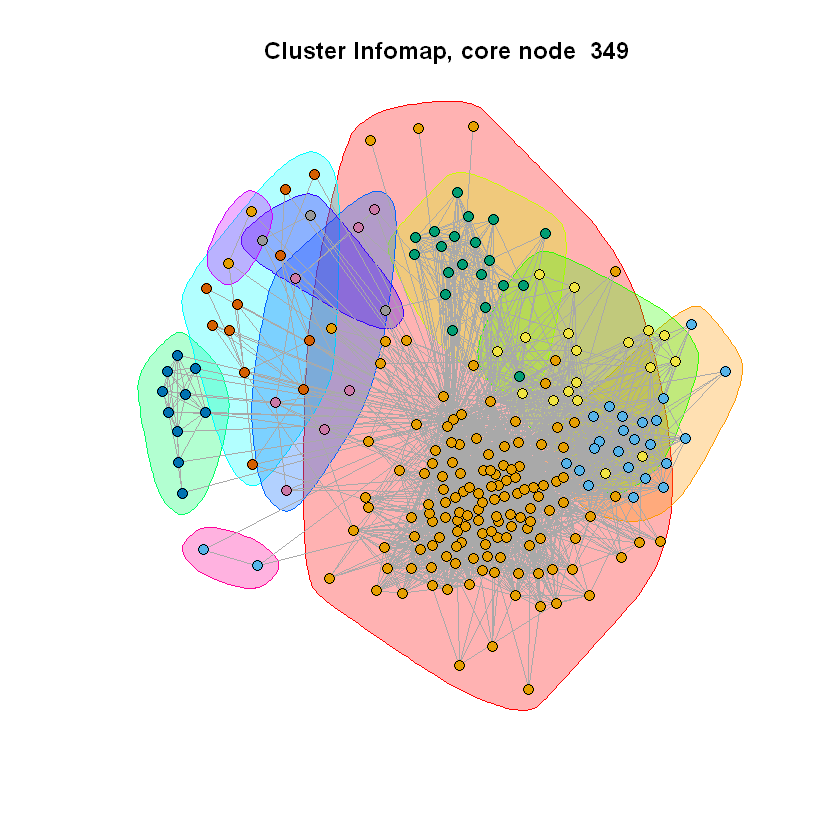

[1] "modularity:  0.0269066172233357 , node id:  1087"


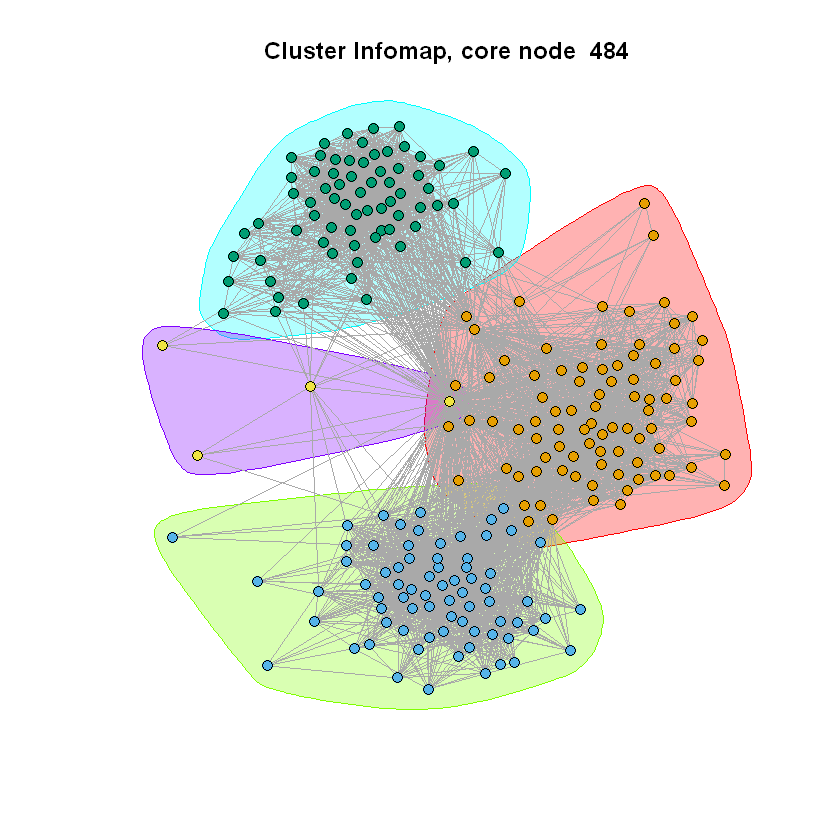

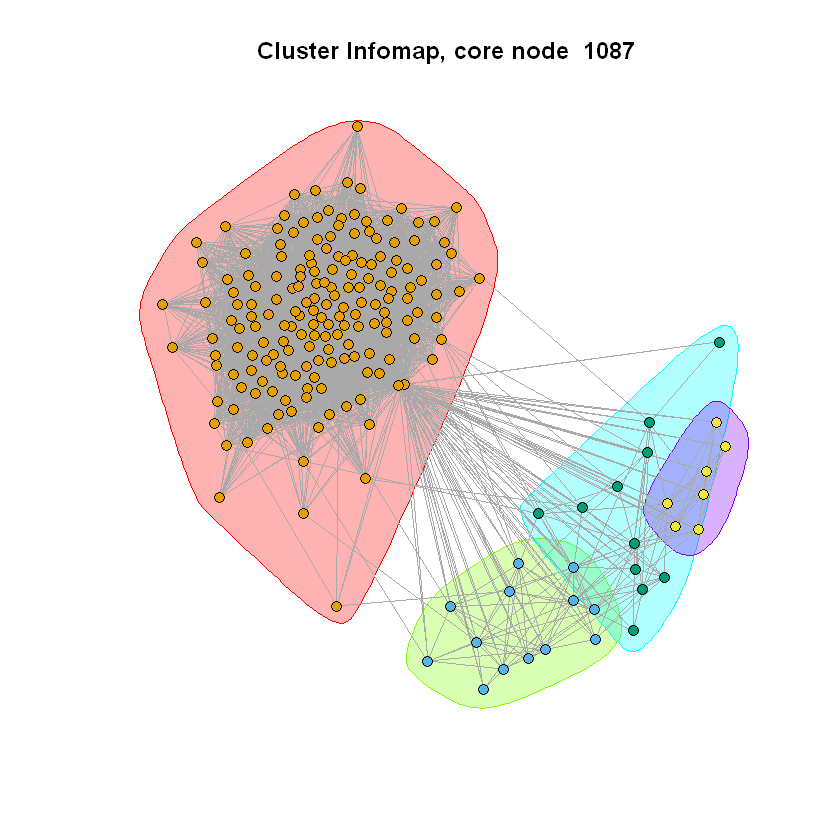

In [16]:

for(i in 1:length(tostudy)) {
    eg = make_ego_graph(gg, order=1, nodes=tostudy)[[i]]
    community = cluster_infomap(eg)
    print(paste('modularity: ',modularity(community), ', node id: ', ids[i]))
    plot(eg, mark.groups= community, vertex.color= membership(community),vertex.size =4, vertex.label =NA , main = paste(" Cluster Infomap, core node ",ids[i]))
    
}

[1] "modularity:  0.44185326886839 , node id:  1"
[1] "modularity:  0.458060328063587 , node id:  108"


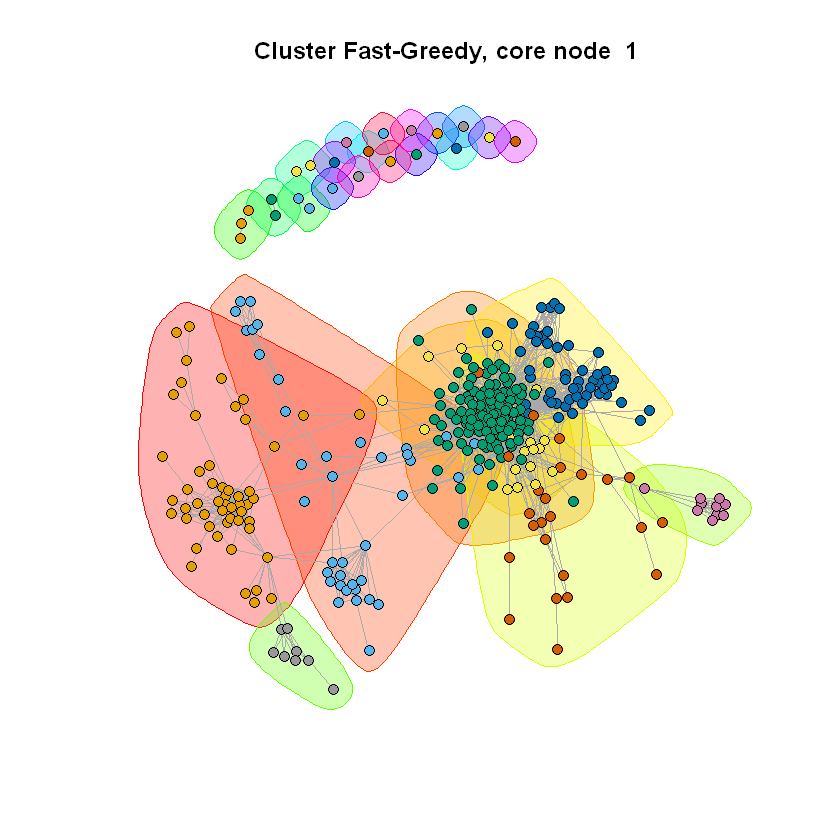

[1] "modularity:  0.245691795942675 , node id:  349"


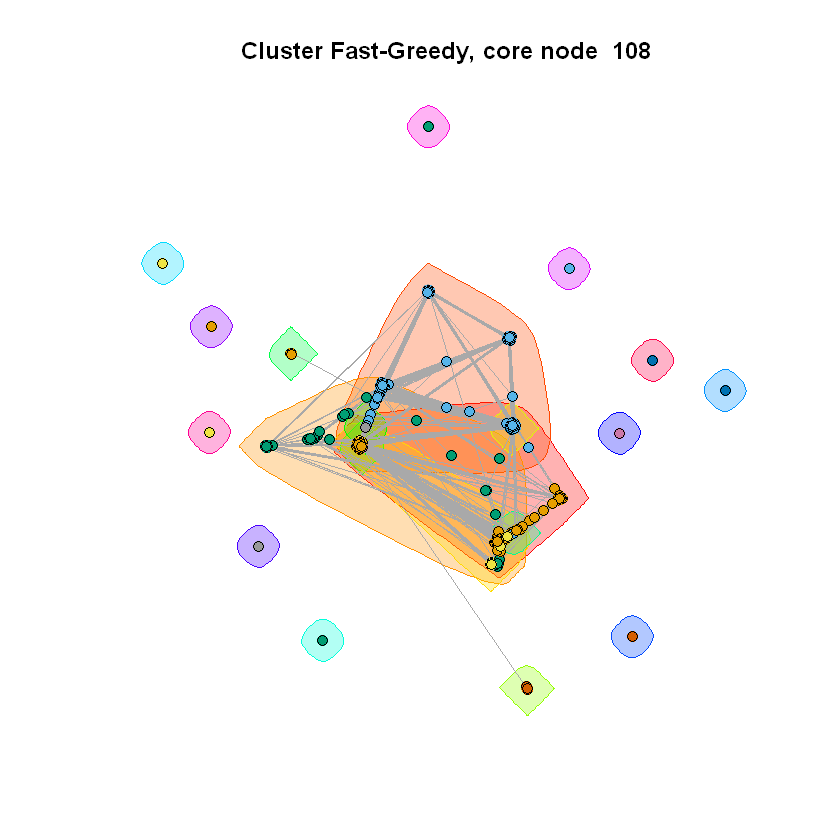

[1] "modularity:  0.534214154606172 , node id:  484"


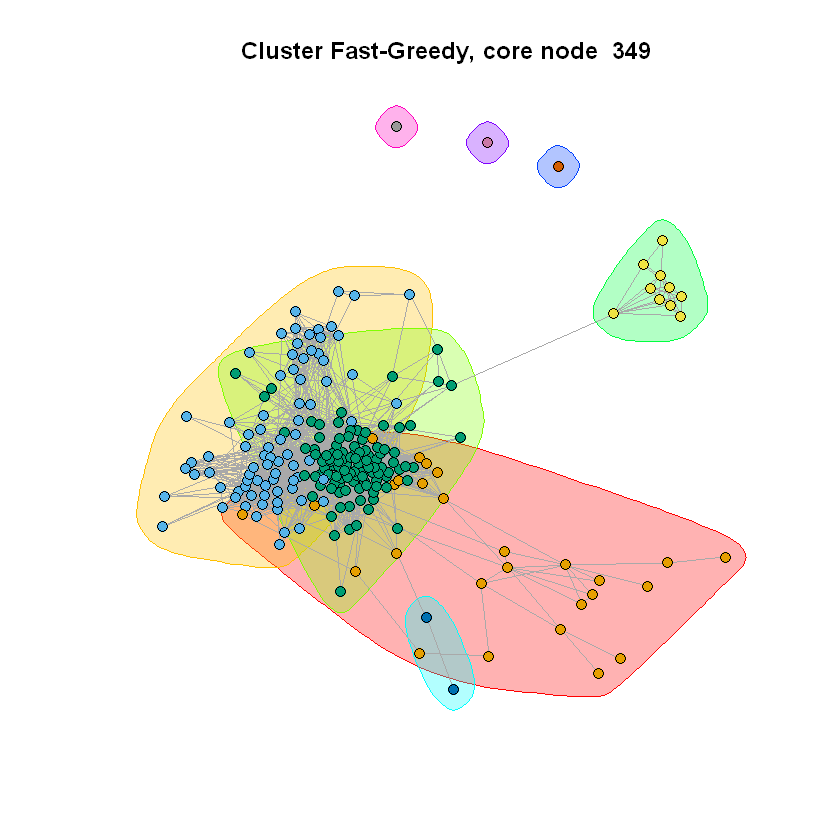

[1] "modularity:  0.148195631953499 , node id:  1087"


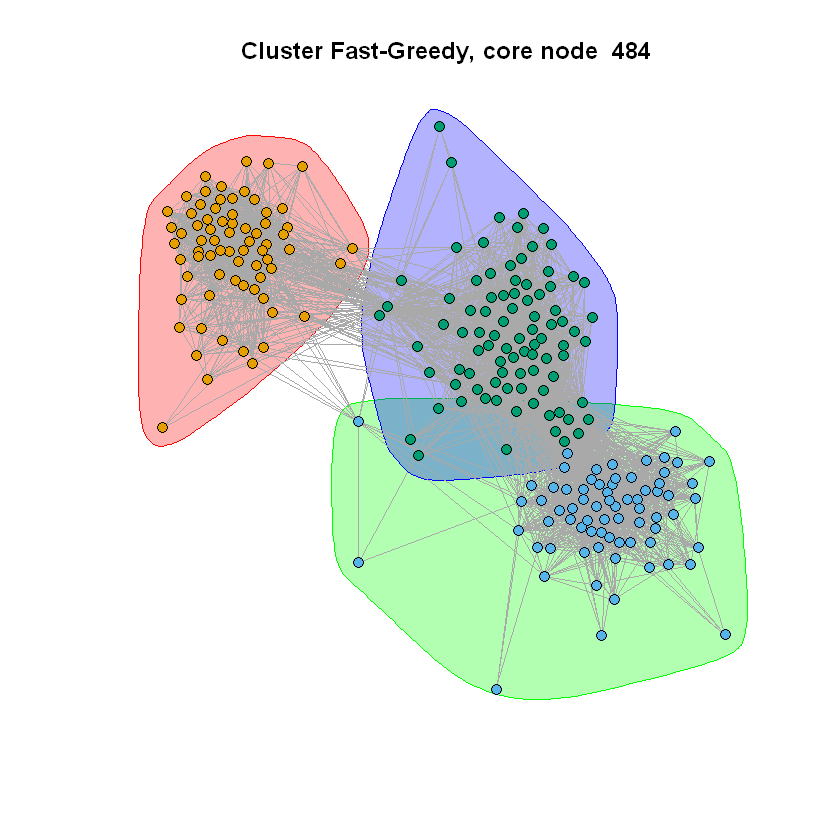

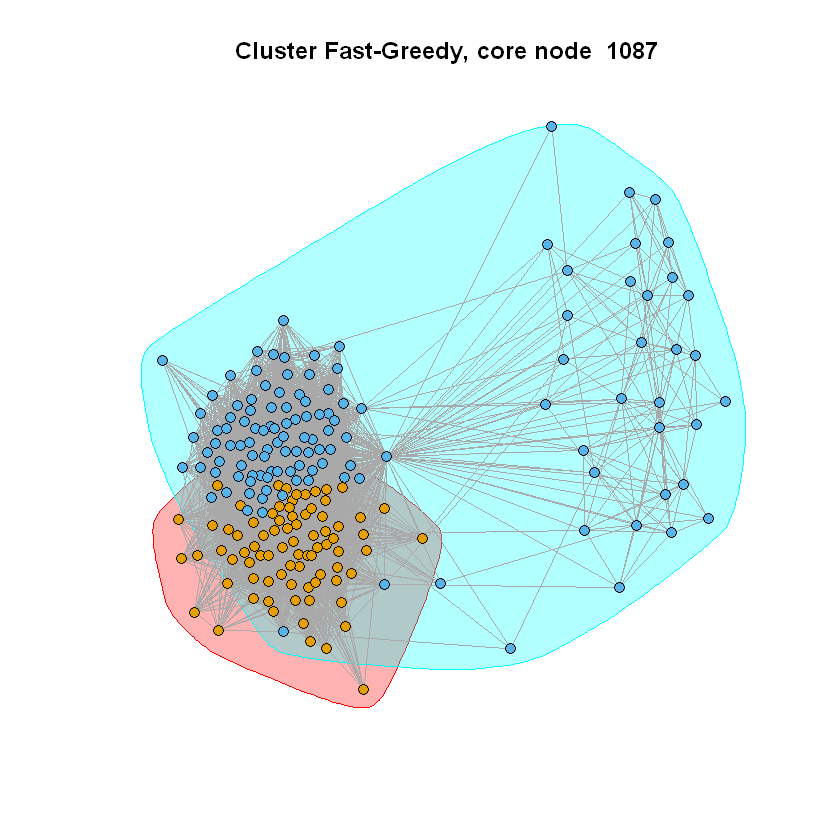

In [17]:
#question 10
tostudy = c('0','107','348','483','1086')
ids = c(1,108, 349 ,484,1087)
for(i in 1:length(tostudy)) {
    eg = make_ego_graph(gg, order=1, nodes=tostudy)[[i]]
    eg = delete_vertices(eg, tostudy[[i]])

    community = cluster_fast_greedy(eg)
    print(paste('modularity: ',modularity(community), ', node id: ', ids[i]))

    plot(eg, mark.groups= community, vertex.color= membership(community),vertex.size =4, vertex.label =NA , main = paste(" Cluster Fast-Greedy, core node ",ids[i]))
    
}
# print(ids[[3]])
# eg = make_ego_graph(gg, order=1, nodes=tostudy)[[3]]
# plot(eg)
# eg = delete_vertices(eg,todyufy[[3]])


[1] "modularity:  0.41614614203983 , node id:  1"
[1] "modularity:  0.521321576382217 , node id:  108"


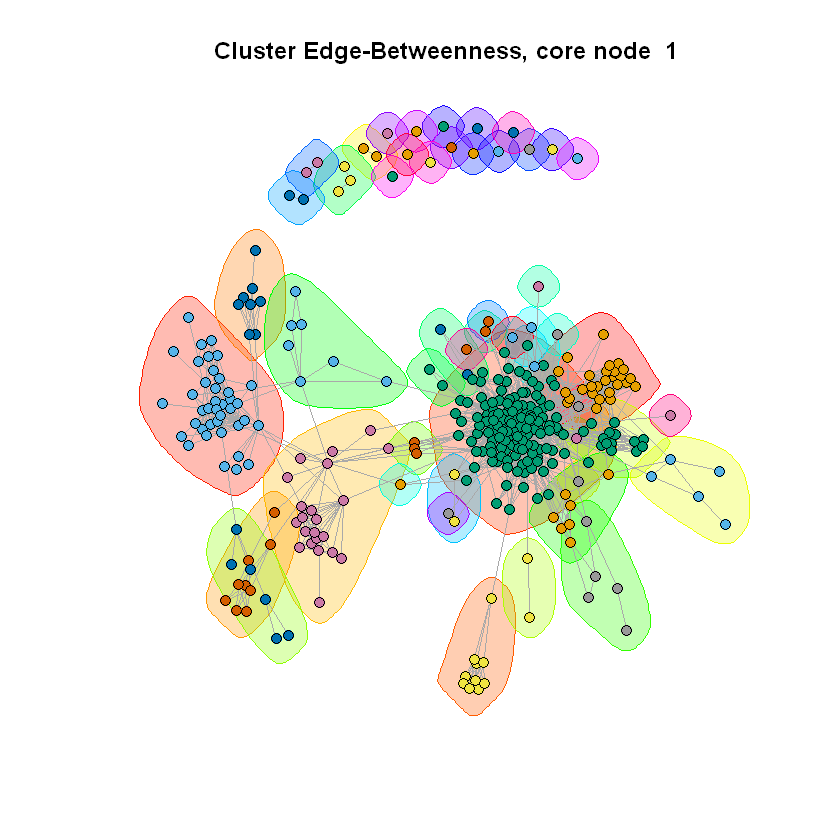

[1] "modularity:  0.150566340187559 , node id:  349"


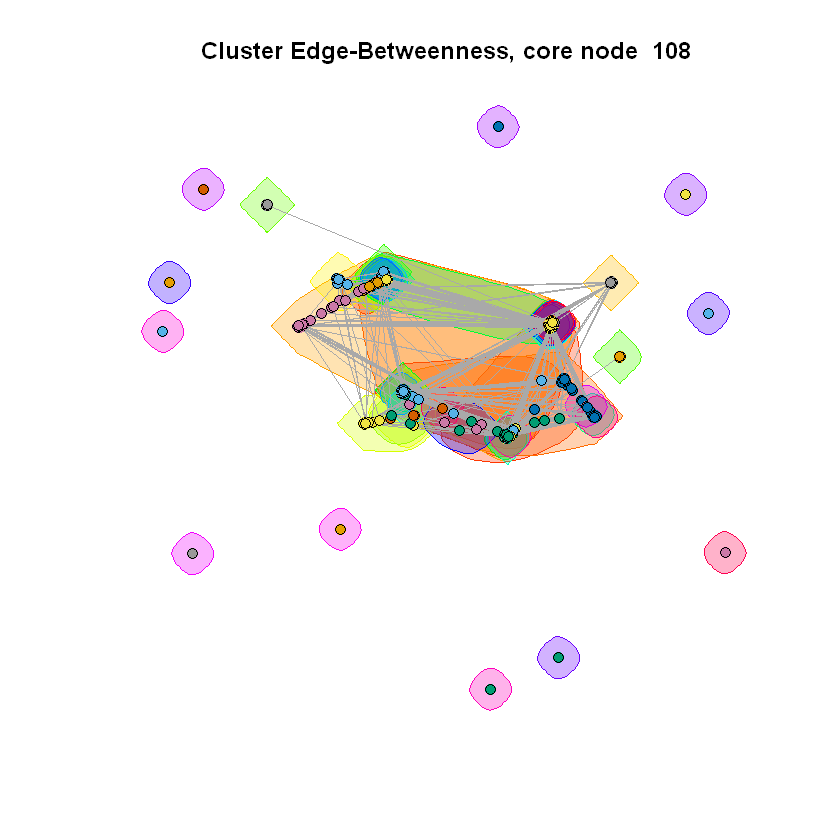

[1] "modularity:  0.515441277123504 , node id:  484"


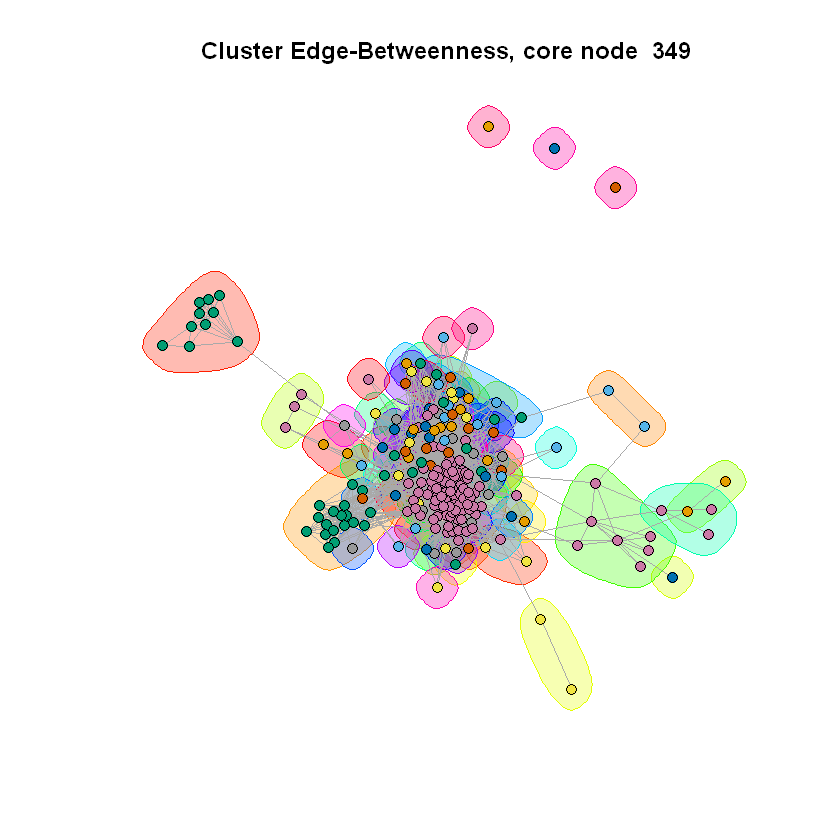

[1] "modularity:  0.0324952980499142 , node id:  1087"


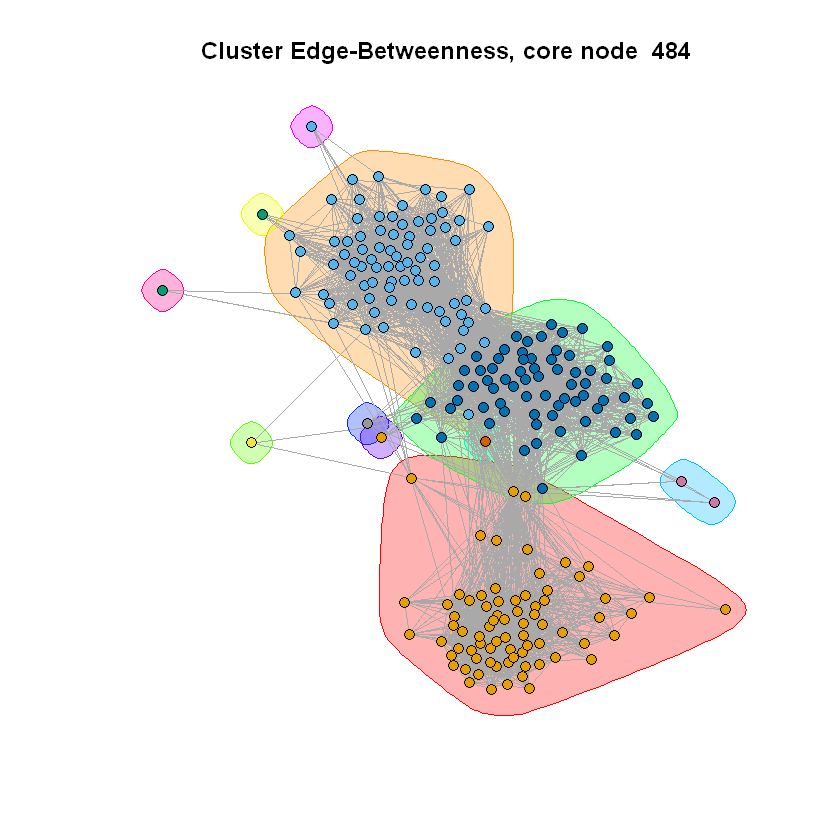

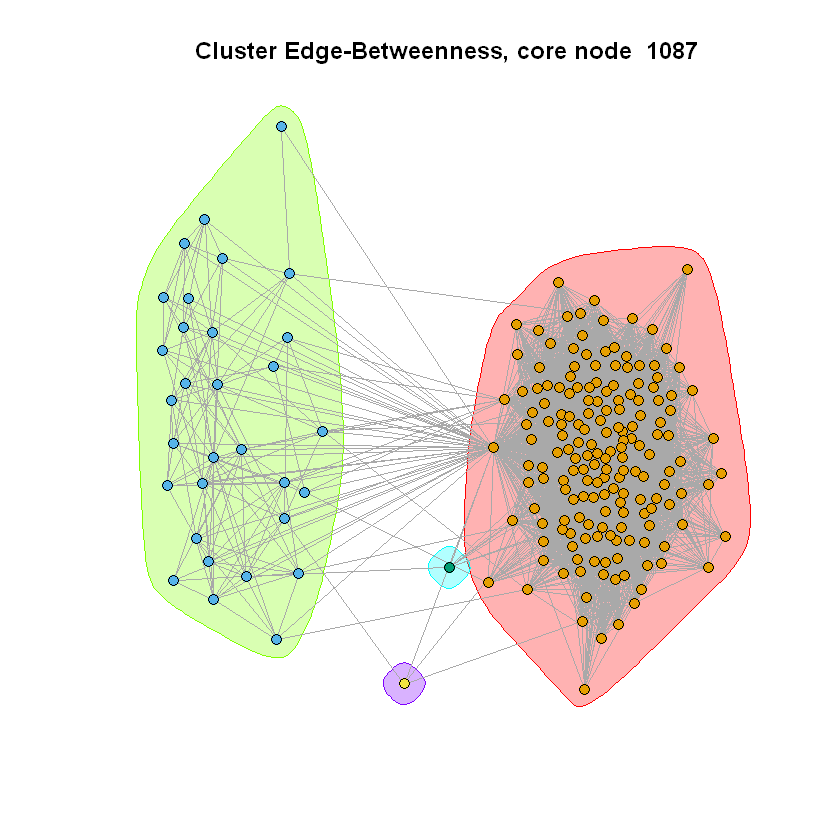

In [18]:
tostudy = c('0','107','348','483','1086')
ids = c(1,108, 349 ,484,1087)
for(i in 1:length(tostudy)) {
    
    eg = make_ego_graph(gg, order=1, nodes=tostudy)[[i]]
    eg = delete_vertices(eg, tostudy[[i]])

    community = cluster_edge_betweenness(eg)
    print(paste('modularity: ',modularity(community), ', node id: ', ids[i]))

    plot(eg, mark.groups= community, vertex.color= membership(community),vertex.size =4, vertex.label =NA , main = paste(" Cluster Edge-Betweenness, core node ",ids[i]))
    
}

[1] "modularity:  0.418007659453891 , node id:  1"
[1] "modularity:  0.518763080793083 , node id:  108"


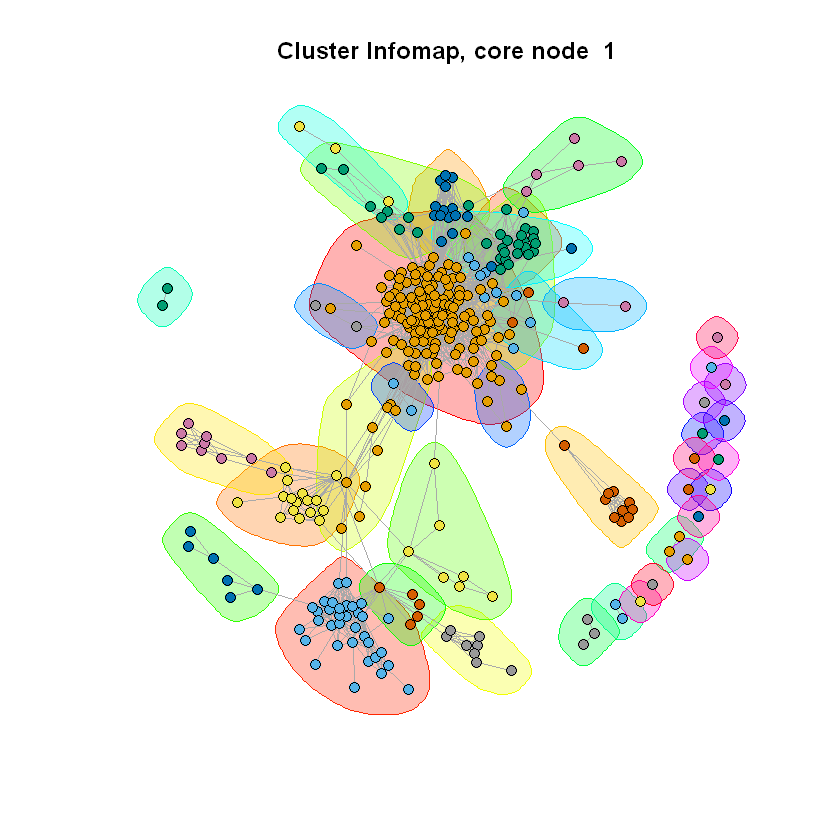

[1] "modularity:  0.246578492623397 , node id:  349"


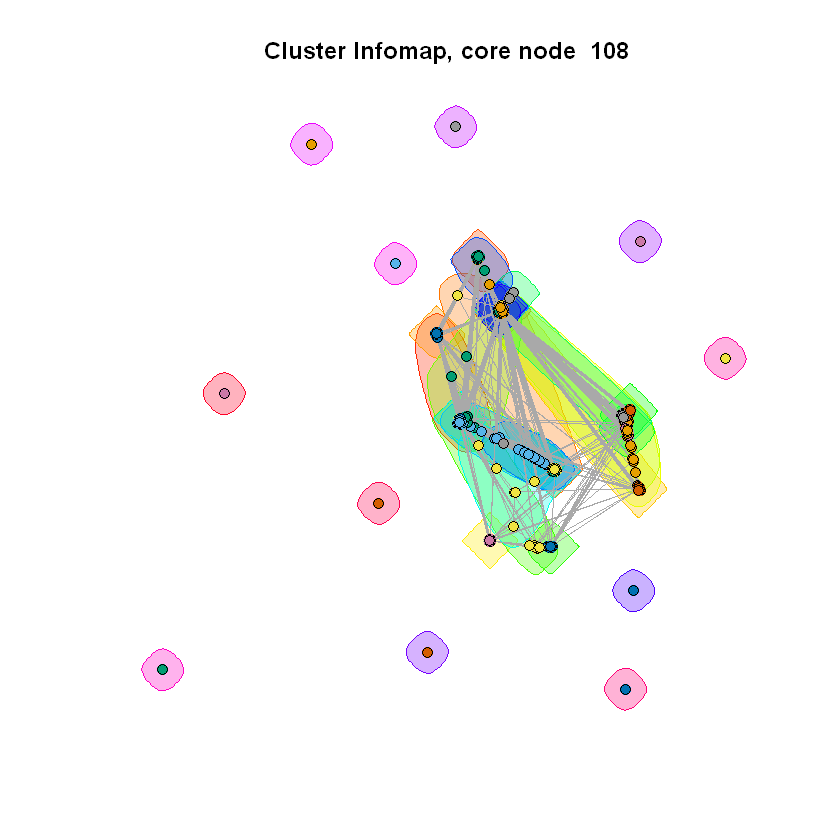

[1] "modularity:  0.543443679279522 , node id:  484"


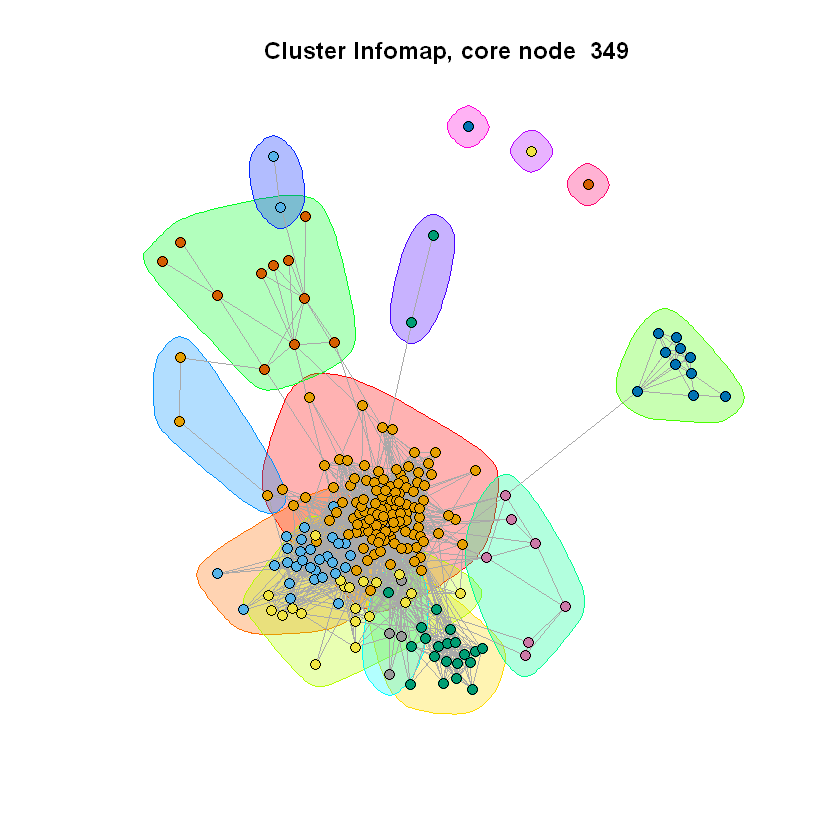

[1] "modularity:  0.0273715944871148 , node id:  1087"


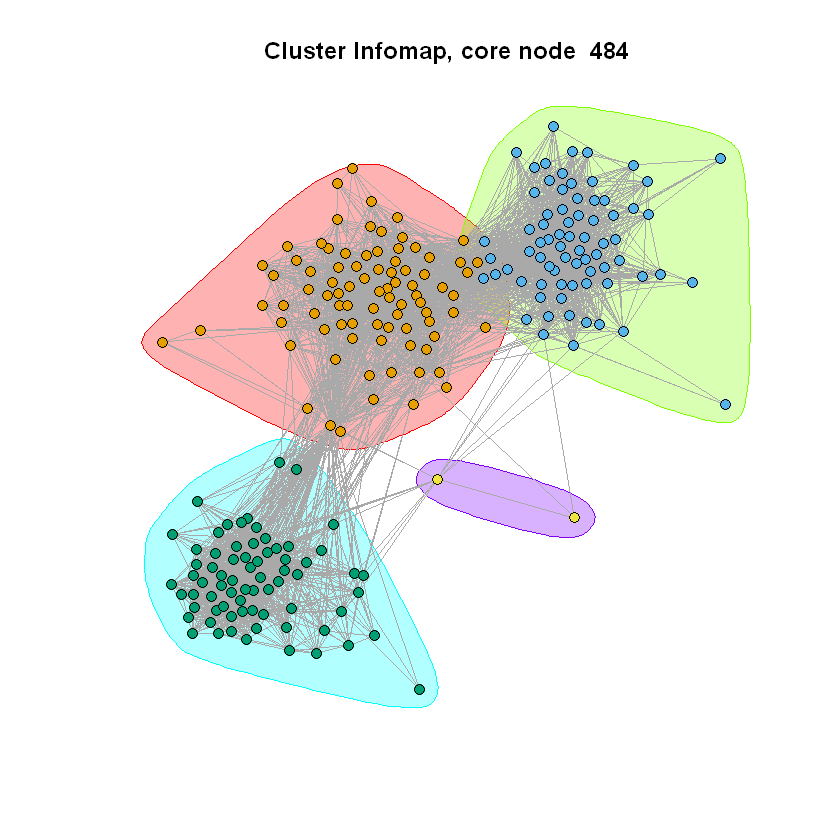

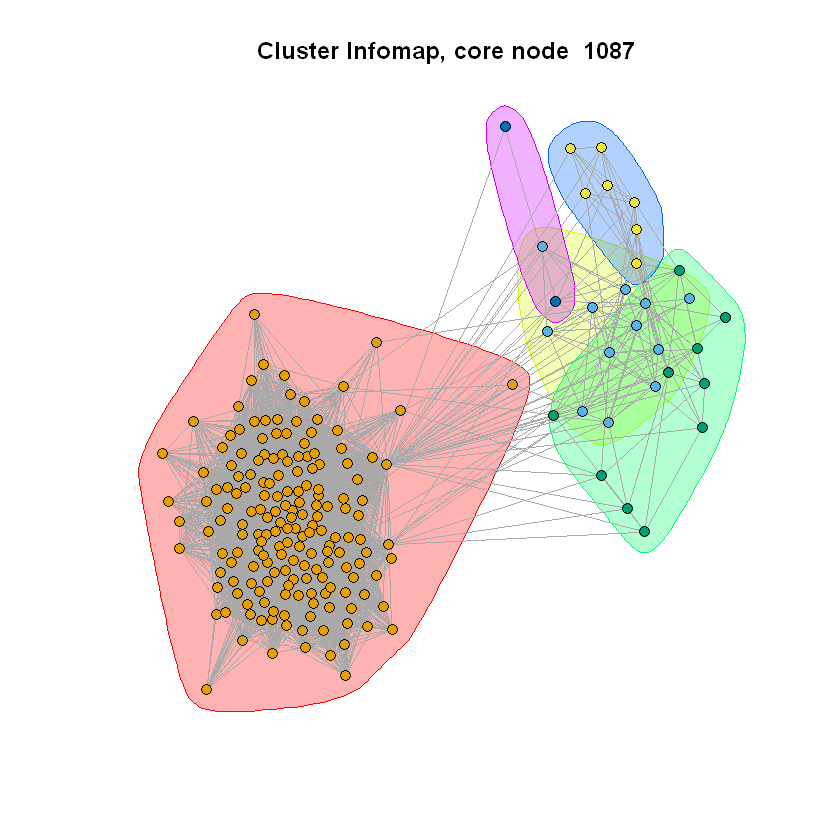

In [19]:
tostudy = c('0','107','348','483','1086')
ids = c(1,108, 349 ,484,1087)
for(i in 1:length(tostudy)) {
    eg = make_ego_graph(gg, order=1, nodes=tostudy)[[i]]
    eg = delete_vertices(eg, tostudy[[i]])

    community = cluster_infomap(eg)
    print(paste('modularity: ',modularity(community), ', node id: ', ids[i]))
    plot(eg,mark.groups= community,  vertex.color= membership(community),vertex.size =4, vertex.label =NA , main = paste(" Cluster Infomap, core node ",ids[i]))
    
}